# Import Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [17]:
df = pd.read_excel("DS - Assignment Part 1 data set.xlsx")

In [18]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


###### Shape of the dataset

In [19]:
df.shape

(414, 9)

In [20]:
min(df['latitude'])

24.93207

In [21]:
max(df['latitude'])

25.01459

###### Info about the data

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


###### Check null values

In [23]:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [24]:
df.columns[df.dtypes == 'object'].tolist()

[]

###### Fill null values with median

In [25]:
for i in df:
    df[i] = df[i].fillna(df[i].median())

###### Visualizing the correlation of features

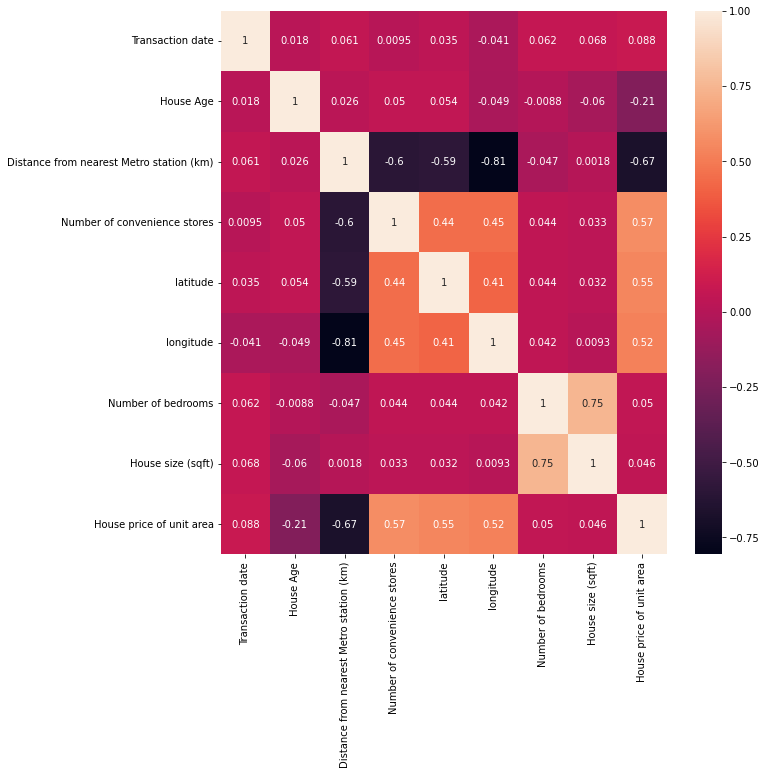

In [26]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(df.corr(), annot = True,ax=ax)
plt.show()

###### Checking correlation with different features

In [27]:
df.corr()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
Transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.061985,0.068405,0.087529
House Age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.008756,-0.060361,-0.210567
Distance from nearest Metro station (km),0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.046856,0.001795,-0.673613
Number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.043638,0.033286,0.571005
latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.043921,0.031696,0.546307
longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.041680,0.009322,0.523287
Number of bedrooms,0.061985,-0.008756,-0.046856,0.043638,0.043921,0.041680,1.000000,0.752276,0.050265
House size (sqft),0.068405,-0.060361,0.001795,0.033286,0.031696,0.009322,0.752276,1.000000,0.046489
House price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,0.050265,0.046489,1.000000


In [28]:
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


###### Splitting the Transaction date column

In [29]:
def func(col):
    l = []
    for i in col:
        i = str(i)
        l.append(i.split(".")[0])
    return l

In [30]:
df['year'] = func(df["Transaction date"])

In [31]:
df['year'] = df['year'].astype('int64')

In [32]:
df.head(2)

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,year
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,2012
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,2012


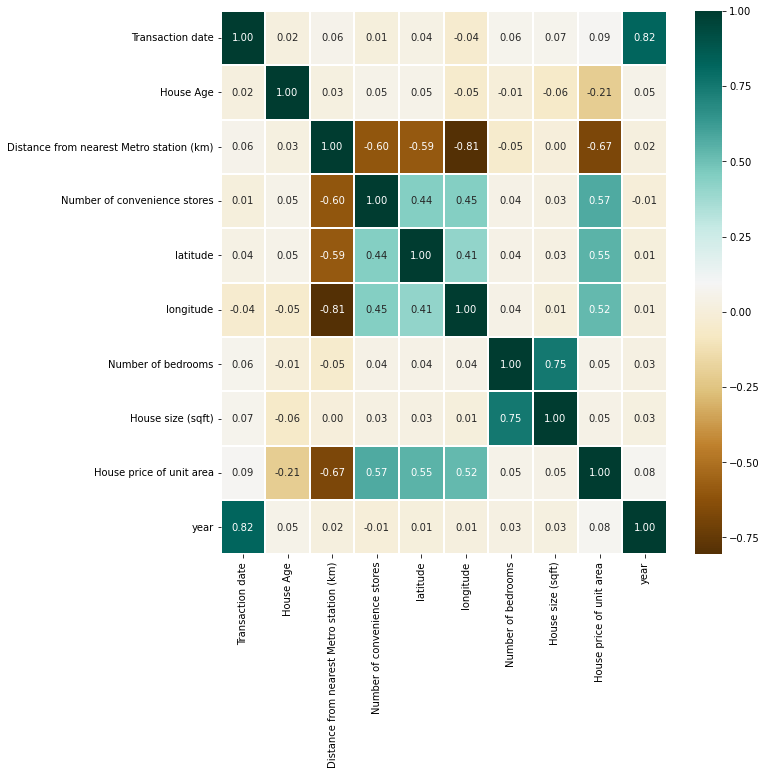

In [33]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(df.corr(), cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True,ax = ax)
plt.show()

In [34]:
###### drop the transaction date column

In [35]:
df.drop('Transaction date',inplace = True,axis =1)

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
House Age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
Distance from nearest Metro station (km),414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
Number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
Number of bedrooms,414.0,1.987923,0.818875,1.00000,1.000000,2.00000,3.000000,3.00000
House size (sqft),414.0,931.475845,348.910269,402.00000,548.000000,975.00000,1234.750000,1500.00000
House price of unit area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000
year,414.0,2012.695652,0.460687,2012.00000,2012.000000,2013.00000,2013.000000,2013.00000


In [37]:
for i in df.columns:
    df[i] = df[i].fillna(df[i].mean())

In [38]:
new_df = df.dropna()

In [39]:
new_df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,year
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,2012
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,2013
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,2013
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,2012


In [40]:
new_df.isnull().sum()

House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
year                                        0
dtype: int64

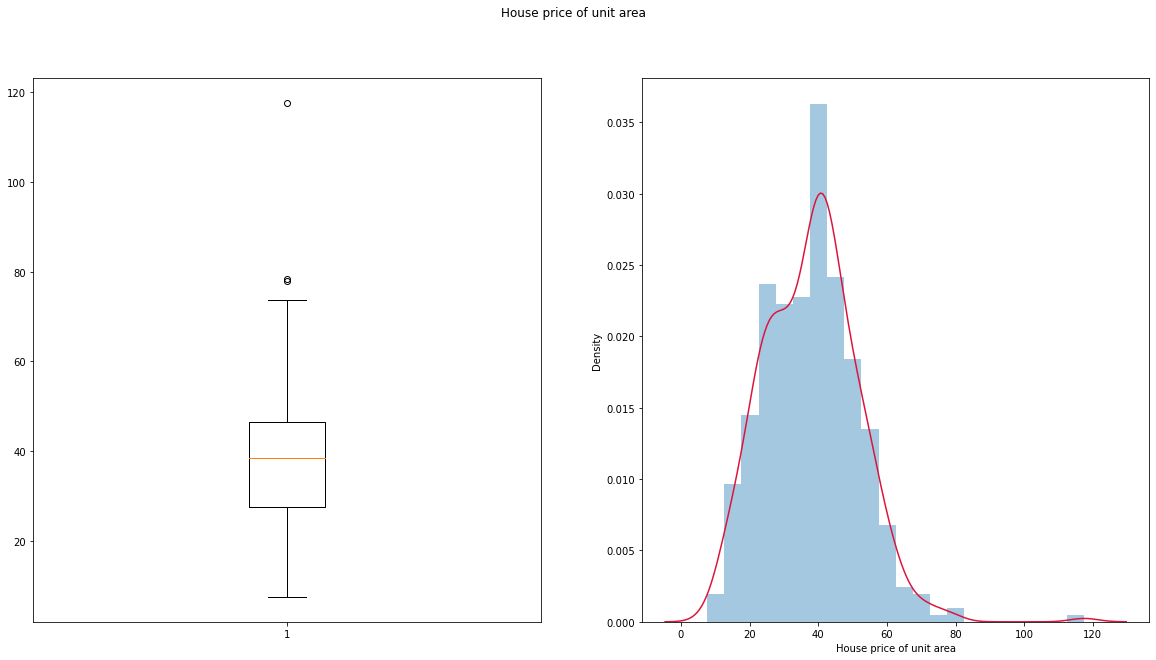

In [41]:
def plot_hist_box(data):
    figure, axis = plt.subplots(1,2,figsize=(20, 10))
    plt.suptitle(data.name)
    axis[0].boxplot(data)
    axis[1] = sns.distplot(data)
    axis[1].lines[0].set_color('crimson')
    plt.show()

plot_hist_box(new_df['House price of unit area'])

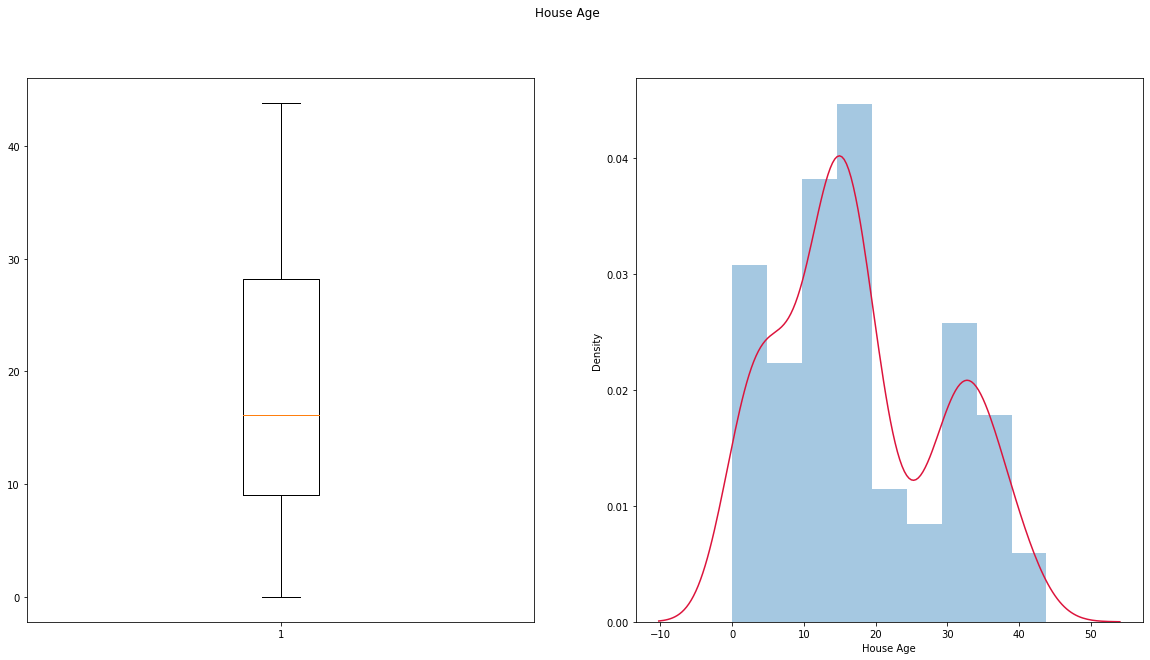

In [42]:
plot_hist_box(new_df['House Age'])

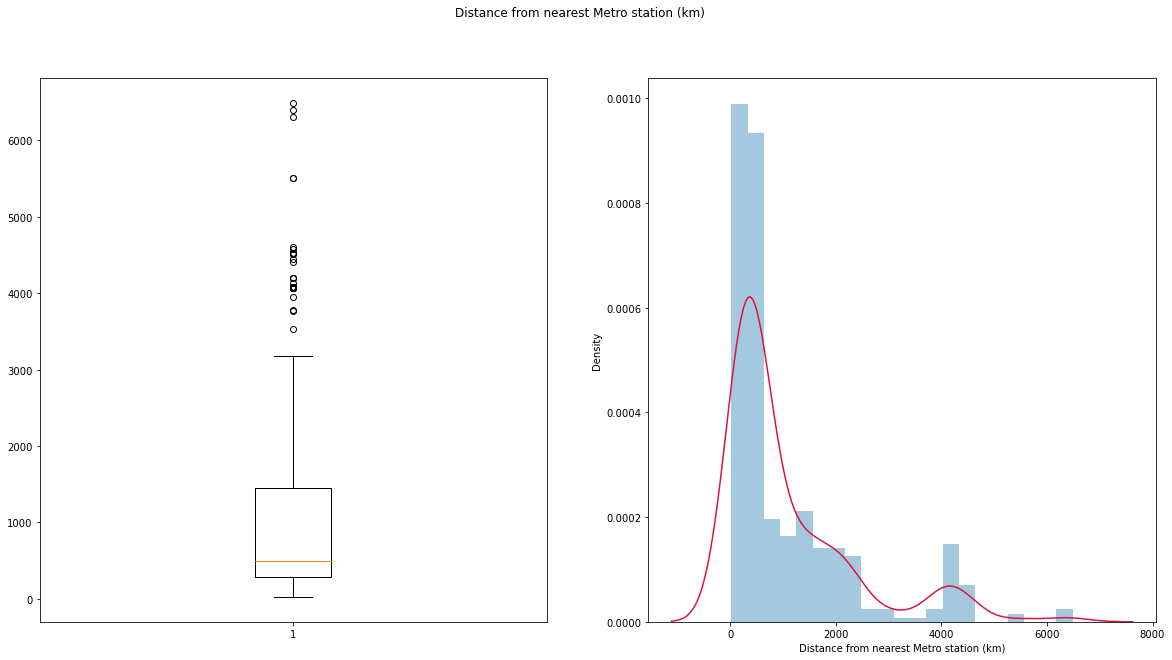

In [43]:
plot_hist_box(new_df['Distance from nearest Metro station (km)'])

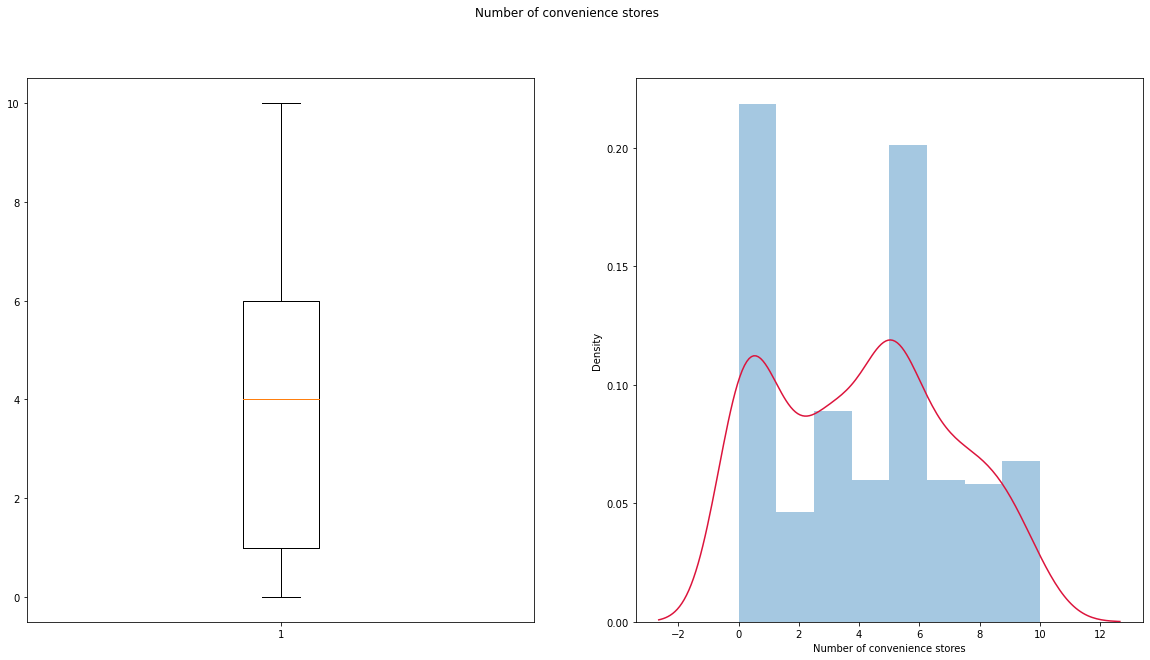

In [44]:
plot_hist_box(new_df['Number of convenience stores'])

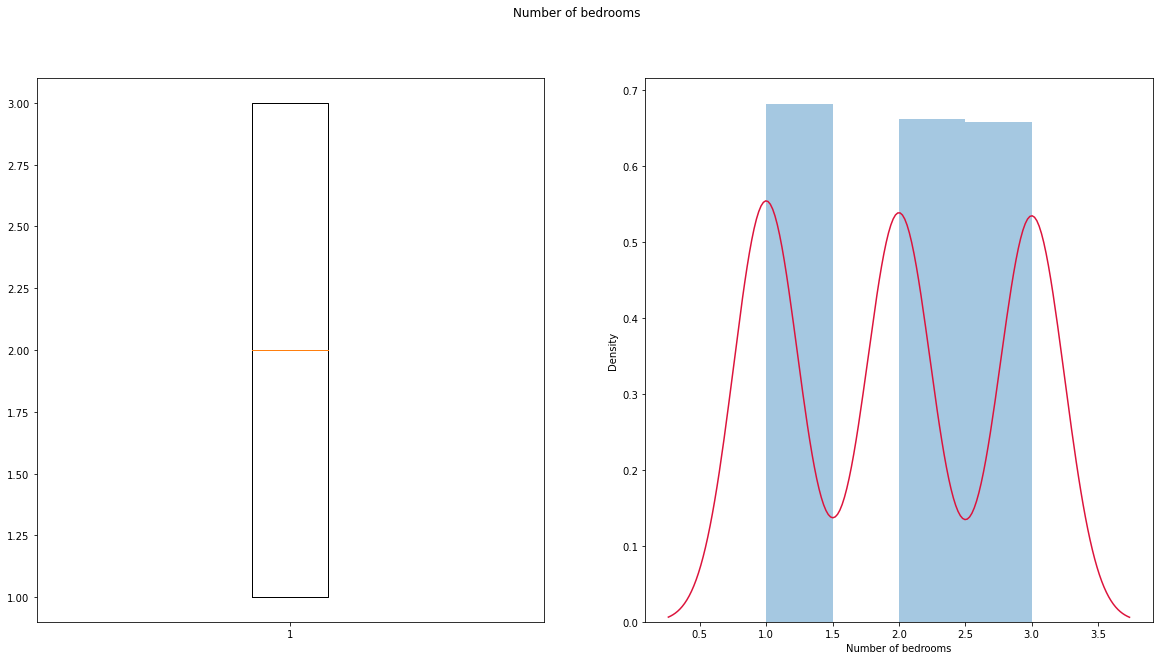

In [45]:
plot_hist_box(new_df['Number of bedrooms'])

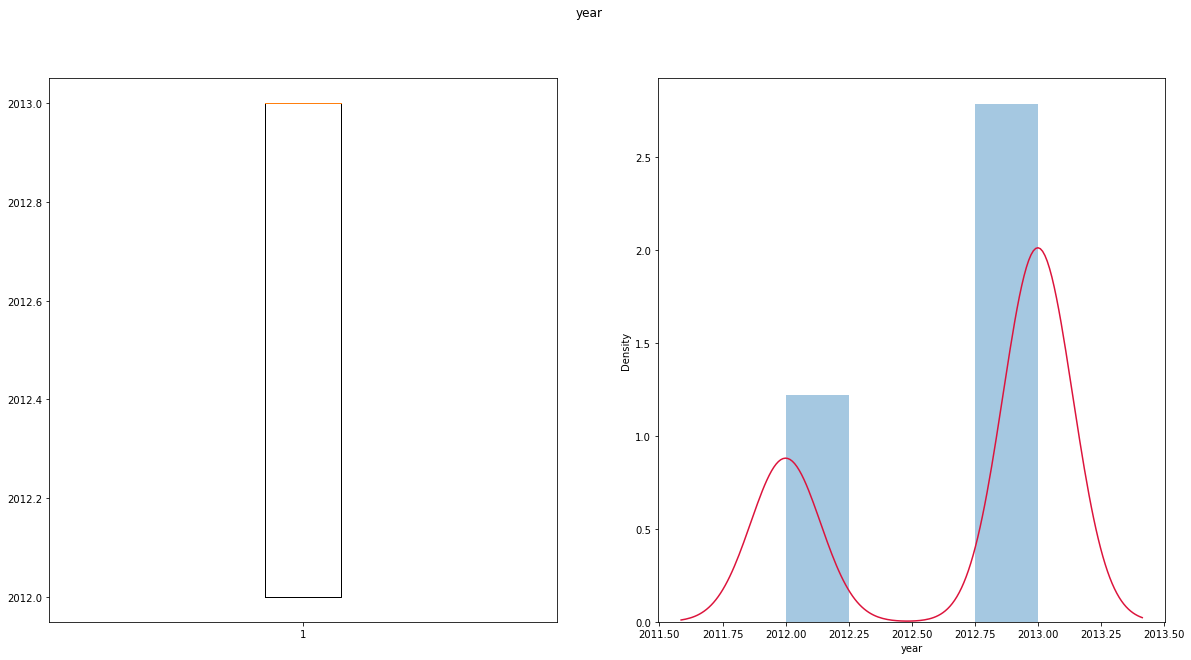

In [46]:
plot_hist_box(new_df['year'])

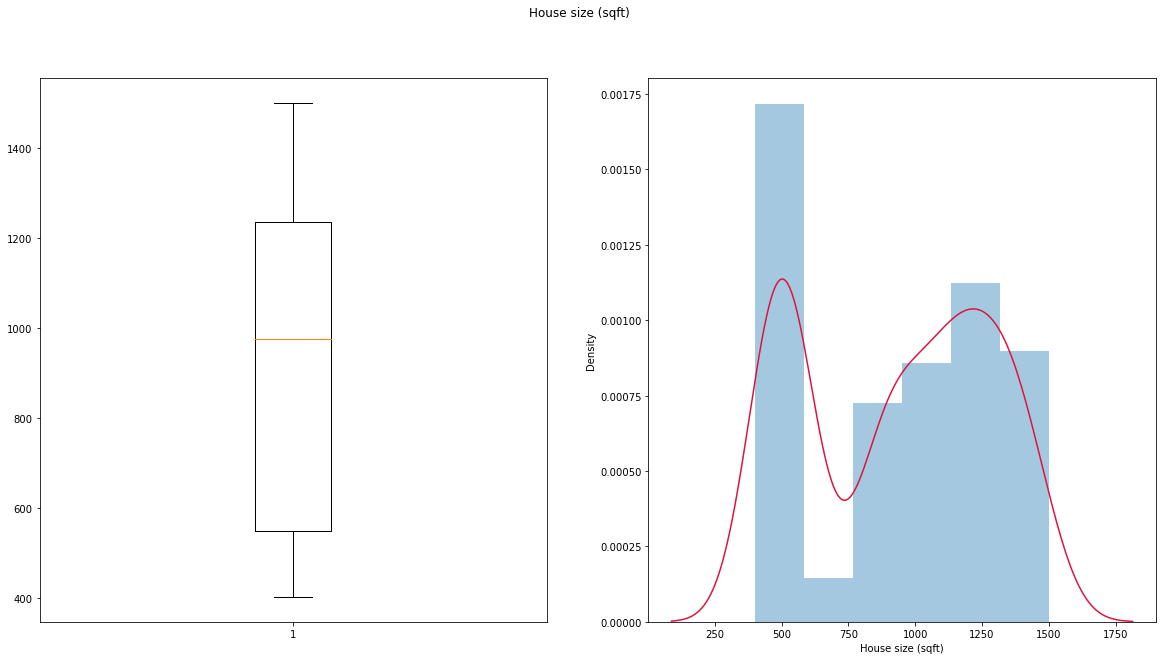

In [47]:
plot_hist_box(new_df['House size (sqft)'])

### Outlier Handling

In [48]:
new_df.head(2)

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,year
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,2012


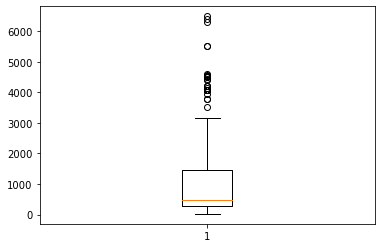

In [49]:
plt.boxplot(new_df['Distance from nearest Metro station (km)'])
plt.show()

In [50]:
x = new_df[new_df['Distance from nearest Metro station (km)'] < 4500]['Distance from nearest Metro station (km)'].median()

In [51]:
x

491.28795

In [52]:
a = new_df[new_df['Distance from nearest Metro station (km)'] > 4500]['Distance from nearest Metro station (km)'].index

In [53]:
for i in a:
    new_df['Distance from nearest Metro station (km)'][i] = x

In [54]:
df.head()

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,year
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2,2012
2,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3,2013
3,13.3,561.98450,5,24.98746,121.54391,2,875,54.8,2013
4,5.0,390.56840,5,24.97937,121.54245,1,491,43.1,2012


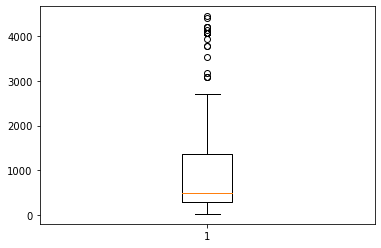

In [55]:
plt.boxplot(new_df['Distance from nearest Metro station (km)'])
plt.show()

In [56]:
new_df[new_df['Distance from nearest Metro station (km)'] > 4500]['Distance from nearest Metro station (km)']

Series([], Name: Distance from nearest Metro station (km), dtype: float64)

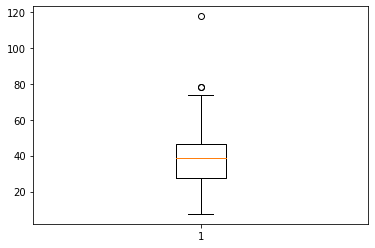

In [57]:
plt.boxplot(new_df['House price of unit area'])
plt.show()

In [58]:
x = new_df[new_df['House price of unit area'] < 80]['House price of unit area'].median()

In [59]:
x

38.4

In [60]:
a = new_df[new_df['House price of unit area'] > 80]['House price of unit area'].index

In [61]:
for i in a:
    new_df['House price of unit area'][i] = x

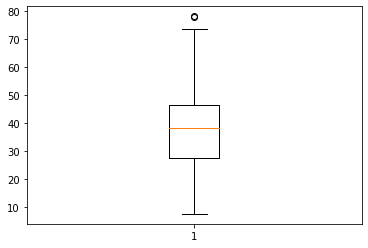

In [62]:
plt.boxplot(new_df['House price of unit area'])
plt.show()

In [63]:
x = new_df[new_df['year']==2013]['year'].value_counts()
x

2013    288
Name: year, dtype: int64

In [64]:
y = new_df[new_df['year']==2012]['year'].value_counts()

In [65]:
y

2012    126
Name: year, dtype: int64

###### Visualizing the different features of columns of the dataset

In [66]:
year = [2012,2013]
count  = [126,288]

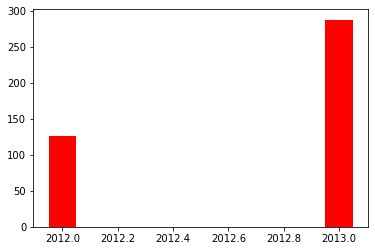

In [67]:
plt.bar(year,count,width = 0.1,color= 'red')
plt.show()

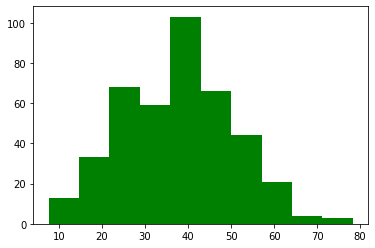

In [70]:
plt.hist(new_df['House price of unit area'],color="green")
plt.show()

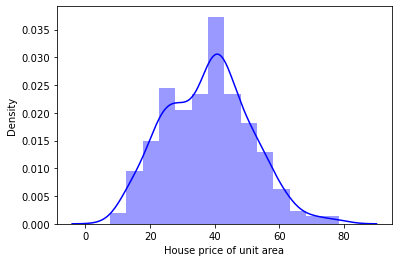

In [71]:
sns.distplot(new_df['House price of unit area'],color="blue")
plt.show()

In [503]:
new_df.columns

Index(['House Age', 'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area',
       'year'],
      dtype='object')

In [72]:
## Histograms of all the features

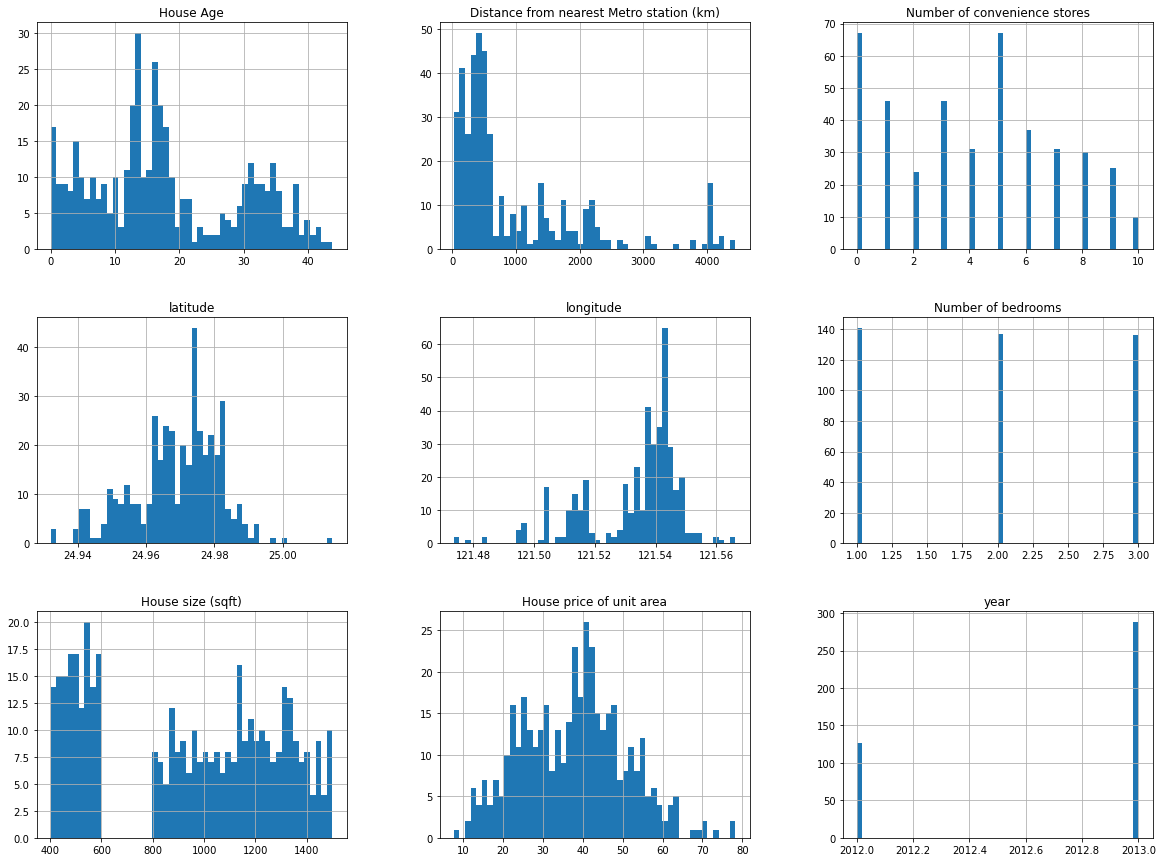

In [504]:
new_df.hist(bins=50, figsize=(20,15))
plt.show()

In [73]:
## Scatter plot of the House age vs House price

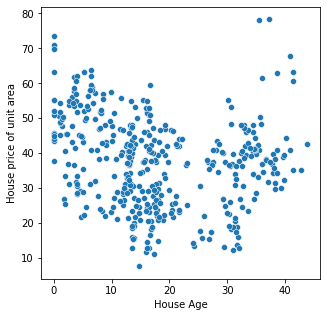

In [74]:
plt.figure(figsize = (5,5))
sns.scatterplot(new_df['House Age'],new_df['House price of unit area'])
plt.show()




# it shows that majority of the house age is between 15 -20 whose house price is 11-30

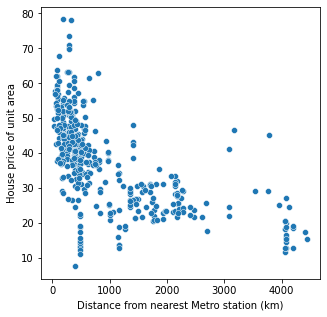

In [75]:
plt.figure(figsize = (5,5))
sns.scatterplot(new_df['Distance from nearest Metro station (km)'],new_df['House price of unit area'])
plt.show()

## It shows that majority of the house price is between 30 - 60 and is within the distance of 1000 km

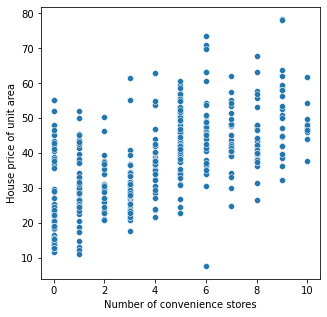

In [507]:
plt.figure(figsize = (5,5))
sns.scatterplot(new_df['Number of convenience stores'],new_df['House price of unit area'])
plt.show()

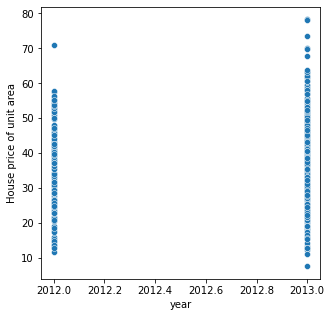

In [508]:
plt.figure(figsize = (5,5))
sns.scatterplot(new_df['year'],new_df['House price of unit area'])
plt.show()

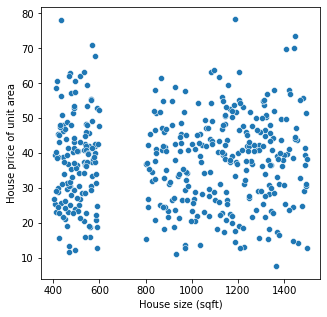

In [509]:
plt.figure(figsize = (5,5))
sns.scatterplot(new_df['House size (sqft)'],new_df['House price of unit area'])
plt.show()

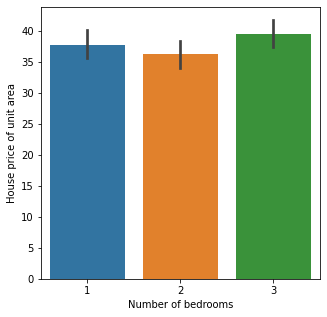

In [510]:
plt.figure(figsize = (5,5))
sns.barplot(new_df['Number of bedrooms'],new_df['House price of unit area'])
plt.show()

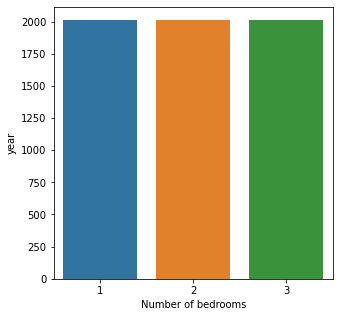

In [511]:
plt.figure(figsize = (5,5))
sns.barplot(new_df['Number of bedrooms'],new_df['year'])
plt.show()

<Figure size 1080x1080 with 0 Axes>

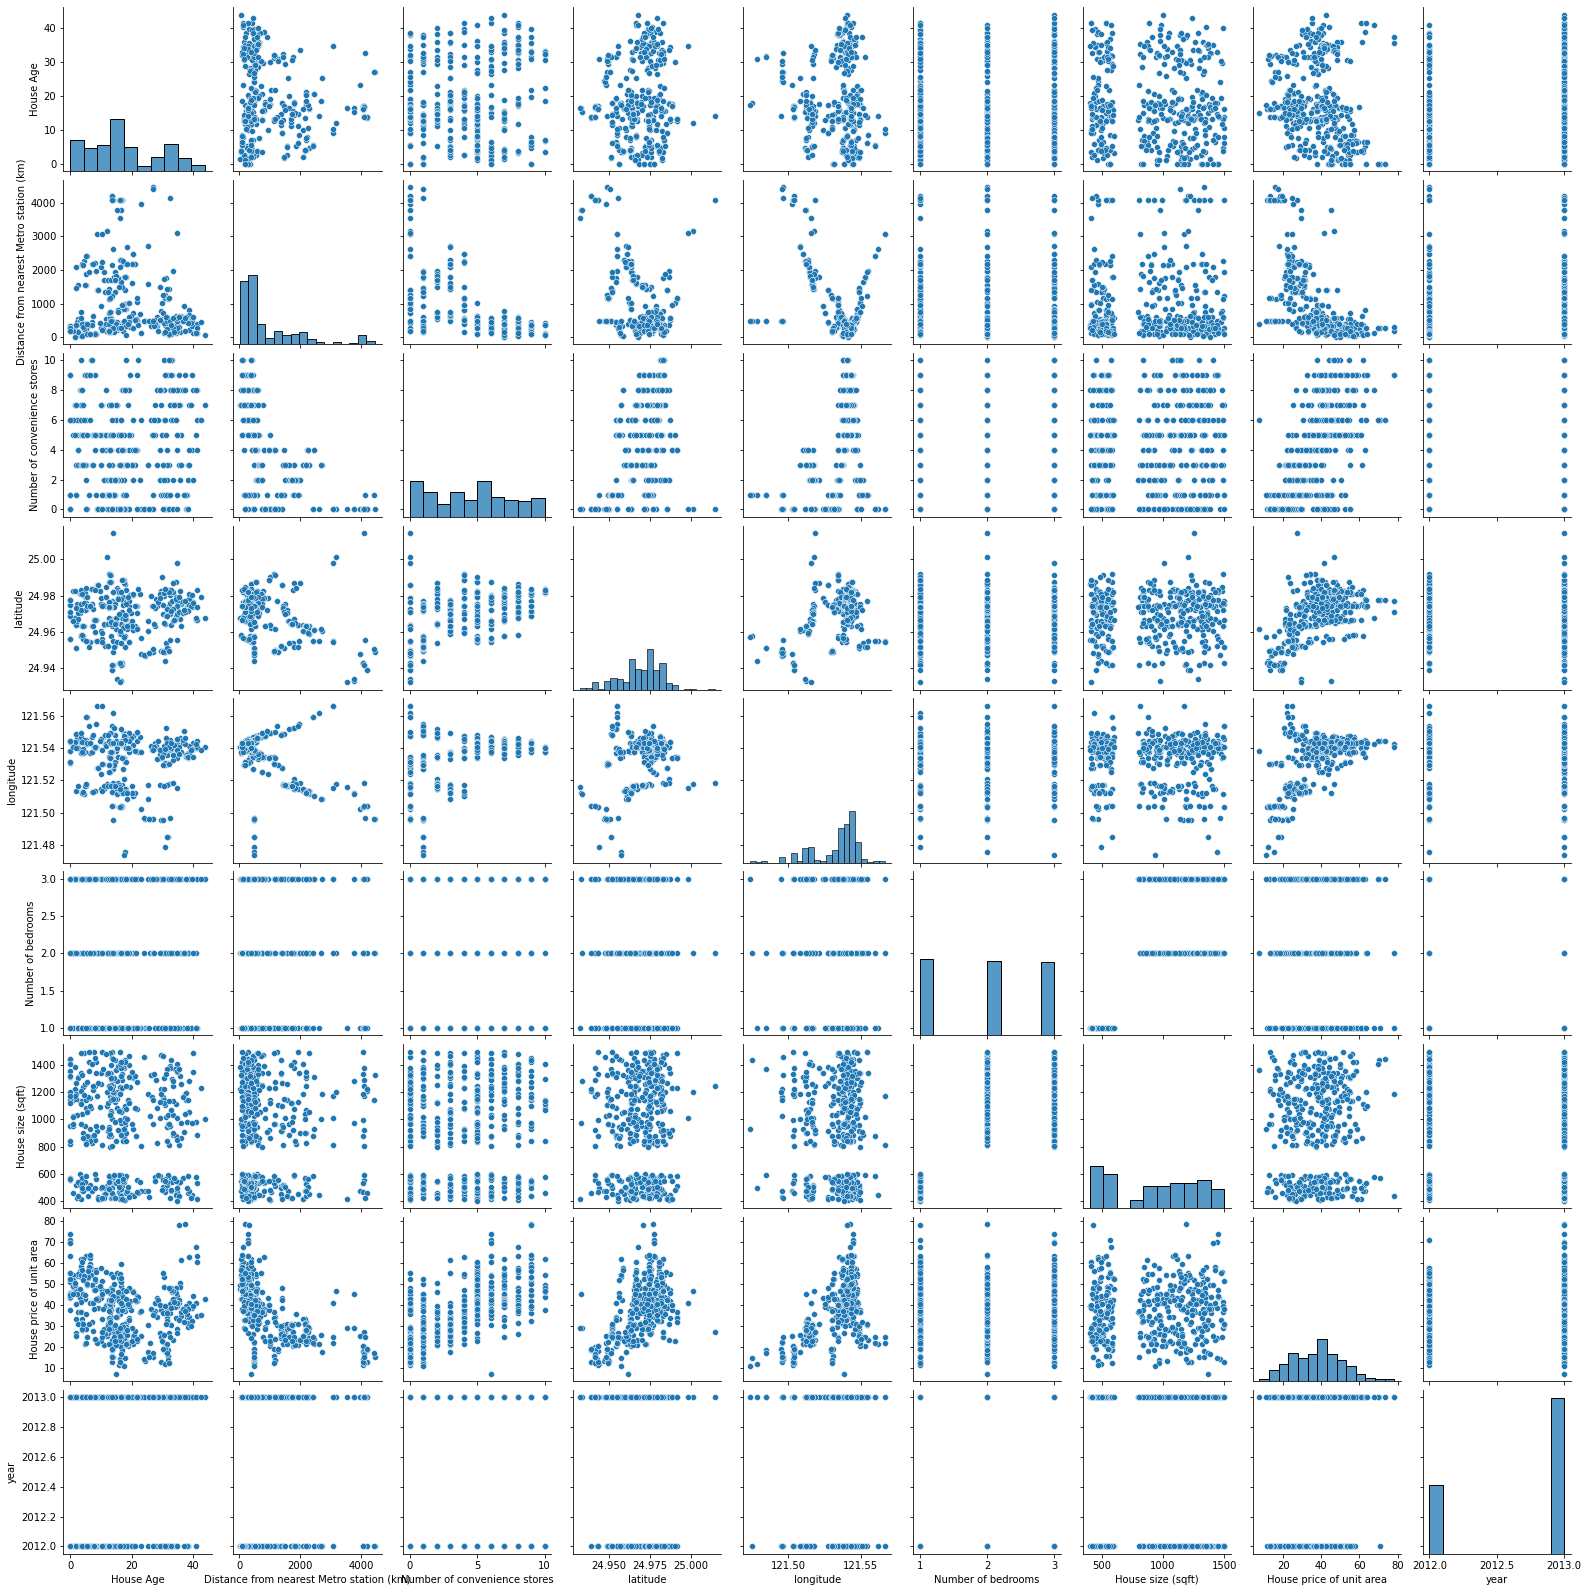

In [512]:
plt.figure(figsize = (15,15))
sns.pairplot(new_df,size = 2.5)
plt.show()

In [513]:
new_df.head(1)

,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area,year
0,32.0,84.87882,10,24.98298,121.54024,1,575,37.9,2012


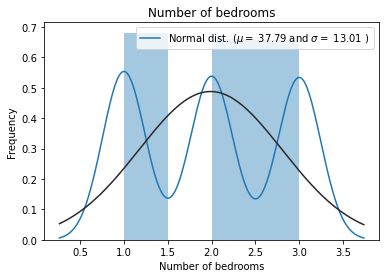

In [514]:
sns.distplot(new_df['Number of bedrooms'] , fit=norm);

(mu, sigma) = norm.fit(new_df['House price of unit area'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Number of bedrooms')
plt.show();

# Model Preparation

###### Splitting the data into the training and testing set

In [515]:
X = new_df.drop(['House price of unit area'], axis=1)
Y = new_df['House price of unit area']
 
# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.7, test_size=0.3, random_state=100)

###### SVR model

In [516]:
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18672482247954397


In [517]:
Y_pred

array([40.27956677, 25.28408552, 44.1170368 , 40.08279903, 43.39647336,
       31.11588383, 42.91733776, 43.39457584, 42.2384235 , 26.68919728,
       41.54557261, 42.38066048, 43.10776872, 39.68941535, 42.53765199,
       40.93082771, 43.41934692, 41.83150485, 28.50710848, 33.63668367,
       40.25596146, 42.95071889, 30.74259966, 42.9301486 , 25.32087988,
       39.72052028, 22.05834664, 43.29548191, 37.25860235, 40.79670253,
       41.81172299, 40.76243649, 43.12888457, 42.50957269, 36.24581441,
       41.73032483, 30.75221534, 22.16654465, 41.74331861, 44.47803457,
       42.40187459, 41.64569754, 24.95815365, 31.61532289, 40.23847   ,
       42.15001812, 42.28332958, 25.3898801 , 39.4092431 , 43.31433643,
       40.03864828, 28.43127246, 33.77475186, 29.85577773, 42.17883546,
       41.98409614, 43.728606  , 31.65496075, 42.3200615 , 25.85917661,
       38.01735576, 41.71066063, 42.20571418, 39.4116873 , 33.86449334,
       41.41168978, 42.24962619, 42.54054999, 40.54120928, 41.19

In [518]:
model_SVR.predict([[13.6,492.23130,5,24.96515,121.53737,1,443,2013]])

array([40.27956677])

<AxesSubplot:xlabel='House price of unit area'>

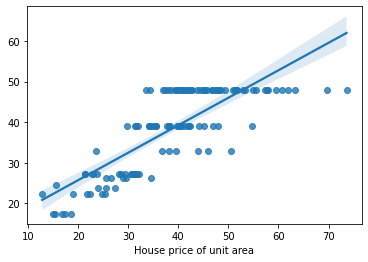

In [519]:
sns.regplot(Y_valid,preds_test)

##### RandomForestRegressor

In [520]:
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
mean_absolute_percentage_error(Y_valid, Y_pred)

0.10269734511987369

In [521]:
model_RFR.predict([[13.6,492.23130,5,24.96515,121.53737,1,443,2013]])

array([40.74])

<AxesSubplot:xlabel='House price of unit area'>

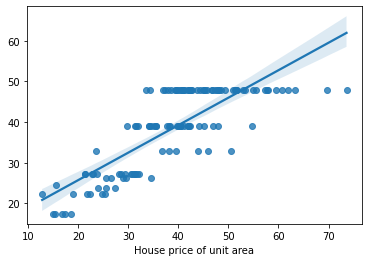

In [522]:
sns.regplot(Y_valid,preds_test)

##### Linear Regression

In [523]:
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.15581748252000083


<AxesSubplot:xlabel='House price of unit area'>

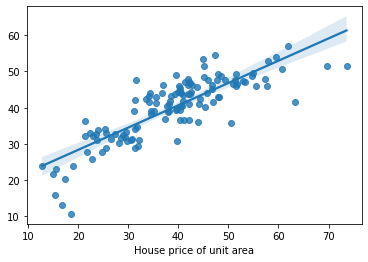

In [524]:
sns.regplot(Y_valid,Y_pred)

##### Lasso Regression

In [525]:
lasso = Lasso(alpha= 0.0002, max_iter=50000)
lasso.fit(X_train, Y_train)

preds_train = lasso.predict(X_train)
preds_test = lasso.predict(X_valid)

mean_absolute_error(Y_valid, preds_test) 

5.3167073006062955

In [526]:
preds_test

array([42.879756  , 34.10364471, 54.03254379, 41.50733785, 48.7292896 ,
       31.23402598, 43.81963231, 48.55454112, 51.61848639, 32.73171439,
       39.08143172, 46.62035558, 37.00481934, 30.84118762, 49.31876103,
       35.93072153, 54.43108105, 43.71747619, 32.2352291 , 23.89498417,
       23.18939718, 42.33207927, 32.87745971, 43.99214804, 25.96968663,
       30.81033409, 27.64043776, 36.53201567, 39.15991671, 41.35732748,
       57.03433926, 36.57812243, 39.66002821, 46.4101637 , 29.34314429,
       46.90085997, 36.42486109, 13.06922723, 44.33161701, 46.11800673,
       46.28429821, 45.88560538, 32.8919106 , 33.36774177, 40.99617645,
       47.54225928, 41.55313634, 30.20840005, 43.88667086, 46.31138472,
       41.51366345, 29.00544245, 43.15928744, 39.04822004, 51.5222481 ,
       47.52031239, 46.00991511, 32.55094495, 46.99644031, 28.93728014,
       40.42139443, 49.70336887, 49.23581014, 38.20478048, 44.04243417,
       43.98667654, 47.97216747, 47.11667268, 36.53620586, 51.63

In [527]:
lasso.predict([[13.6,492.23130,5,24.96515,121.53737,1,443,2013]])

array([42.879756])

<AxesSubplot:xlabel='House price of unit area'>

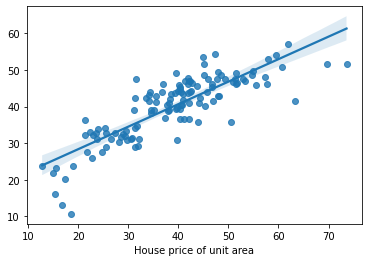

In [528]:
sns.regplot(Y_valid,preds_test)

###### XGBRegressor

In [529]:
xgboost = XGBRegressor(n_estimators = 25)

xgboost.fit(X_train, Y_train)

preds_test = xgboost.predict(X_valid)

mean_absolute_error(Y_valid, preds_test)

3.9468220962524416

<AxesSubplot:xlabel='House price of unit area'>

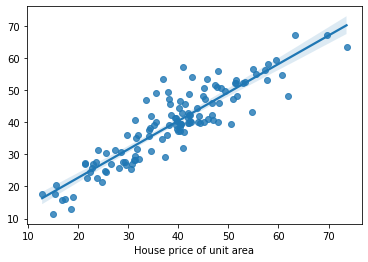

In [530]:
sns.regplot(Y_valid,preds_test)

##### GradientBoostingRegressor

In [531]:
GBR = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)

In [532]:
GBR.fit(X_train,Y_train)

preds_test = GBR.predict(X_valid)
mean_absolute_error(Y_valid, preds_test)

3.711630162156669

In [533]:
print(GBR.predict([[13.6,492.23130,5,24.96515,121.53737,1,443,2013]]))

[40.48419589]


<AxesSubplot:xlabel='House price of unit area'>

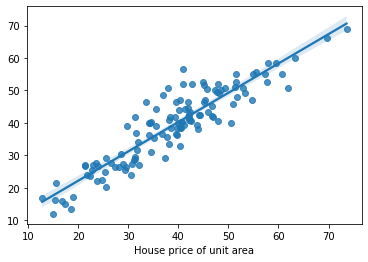

In [534]:
sns.regplot(Y_valid,preds_test)

#####   DecisionTreeRegressor

In [535]:
DTR = DecisionTreeRegressor(criterion='absolute_error',
    splitter='best',
    max_depth=25,
    min_samples_split=20,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features= "sqrt",
    random_state=42,
    max_leaf_nodes=10,
    min_impurity_decrease=0.001,
    ccp_alpha=0.001)

In [536]:
DTR.fit(X_train,Y_train)
preds_test = DTR.predict(X_valid)
mean_absolute_error(Y_valid, preds_test)

5.384399999999999

In [537]:
print(DTR.predict([[13.6,492.23130,5,24.96515,121.53737,1,443,2013]]))

[39.]


<AxesSubplot:xlabel='House price of unit area'>

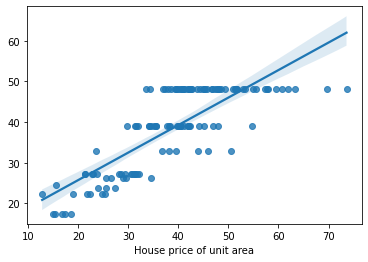

In [538]:
sns.regplot(Y_valid,preds_test)

#### Best Model 

 The least  error is obtained in  RandomForestRegressor

### Building a  predictive system

In [539]:
def model_name(name):
    name.fit(X_train,Y_train)
    preds_test = name.predict(X_valid)
    mean_absolute_error(Y_valid, preds_test)
    House_age = float(input("House Age:,"))
    Distance=  float(input(("Distance from nearest Metro station (km):")))
    stores = float(input(("Number of convenience stores:",)))
    latitude = float(input(("latitude:",)))
    longitutde = float(input(("longititude:",)))
    bedrooms = float(input("Number of bedrooms:",))
    House_size =  float(input("House size (sqft):",))
    year = float(input('year:,'))
    
    return name.predict([[House_age,Distance,stores,latitude,longitutde,bedrooms,House_size,year]])

In [541]:
model_name(GBR)

# Project Completed By - Swetanshu Pandey